In [1]:
import re
import json
import pandas as pd
import matplotlib
matplotlib.use('nbAgg')
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

# Set iPython to display visualization inline
%matplotlib inline

In [2]:
tweets_data_path = '../data/Twitter_Zika_FullDataSet.txt'

tweets_data_full = []
tweets_file = open(tweets_data_path, "r")


for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data_full.append(tweet)
    except:
        pass 

print("This document contains %d tweets.\n" %(len(tweets_data_full)))


FileNotFoundError: [Errno 2] No such file or directory: '../data/Twitter_Zika_FullDataSet.txt'

In [6]:
s = json.dumps(tweets_data_full, indent=2)
print(s[:30])

[
  {
    "in_reply_to_status_


In [7]:
# Write out FULL Twitter JSON File:
with open('../data/Twitter_Zika_FullData.json', 'w') as twitterJSONFile_out:
    twitterJSONFile_out.write(s)

In [2]:
# Read in FULL Twitter JSON File:
with open('../data/Twitter_Zika_FullData.json', 'r') as twitterJSONFile_in:
    tweets_data_full = json.load(twitterJSONFile_in)

print(type(tweets_data_full))


<class 'list'>


In [3]:
# list comprehension to create a data frame of important information

user_ID         = [(T['user']['id'] if 'user' in T else None) for T in tweets_data_full]
user_userName   = [(T['user']['screen_name'] if 'user' in T else None) for T in tweets_data_full]
user_screenName = [(T['user']['name'] if 'user' in T else None) for T in tweets_data_full]
tweet_location  = [(T['place']['full_name'] if 'place' in T and T['place'] is not None else None) for T in tweets_data_full]
tweet_country   = [(T['place']['country_code'] if 'country_code' in T else None) for T in tweets_data_full]
geo_lats        = [(T['geo']['coordinates'][0] if 'geo' in T and T['geo'] is not None else None) for T in tweets_data_full]
geo_lons        = [(T['geo']['coordinates'][1] if 'geo' in T and T['geo'] is not None else None) for T in tweets_data_full]
tweet_time      = [(T['created_at'] if 'created_at' in T else None) for T in tweets_data_full]
tweet_lang      = [(T['lang'] if 'lang' in T and T['lang']!='und' else None) for T in tweets_data_full]
text            = [(T['text'] if 'text' in T else None) for T in tweets_data_full]
in_reply_to_screen_name = [(T['in_reply_to_screen_name'] if 'in_reply_to_screen_name' in T else None) for T in tweets_data_full]


In [4]:
tweet_location_names  = [x for x in tweet_location if x is not None]
print(len(tweet_location_names))
tweet_location_unique = set(tweet_location_names)
print(len(tweet_location_unique))

1264
684


In [6]:
tweet_lat_lon_dict = {}

In [7]:
# Turning the place name into a geo (lat,lon) location
geolocator = Nominatim()

for i, placeName in enumerate(tweet_location_unique):
    if placeName not in tweet_lat_lon_dict:
        try:
            placeGeo  = geolocator.geocode(placeName)
        except Exception as E:
            print("exception happened", type(E), E)

        if i % 20 == 0:
            print(i)
        if placeGeo is not None:
            tweet_lat_lon_dict[placeName] = (placeGeo.latitude, placeGeo.longitude)
        else:
            tweet_lat_lon_dict[placeName] = (None, None)
    

0
20
40
60
80
100
exception happened <class 'geopy.exc.GeocoderTimedOut'> Service timed out
exception happened <class 'geopy.exc.GeocoderTimedOut'> Service timed out
120
140
160
180
exception happened <class 'geopy.exc.GeocoderTimedOut'> Service timed out
200
220
240
260
280
300
320
340
360
exception happened <class 'geopy.exc.GeocoderTimedOut'> Service timed out
exception happened <class 'geopy.exc.GeocoderTimedOut'> Service timed out
380
400
exception happened <class 'geopy.exc.GeocoderTimedOut'> Service timed out
exception happened <class 'geopy.exc.GeocoderTimedOut'> Service timed out
420
exception happened <class 'geopy.exc.GeocoderTimedOut'> Service timed out
440
460
exception happened <class 'geopy.exc.GeocoderTimedOut'> Service timed out
exception happened <class 'geopy.exc.GeocoderTimedOut'> Service timed out
480
exception happened <class 'geopy.exc.GeocoderTimedOut'> Service timed out
500
exception happened <class 'geopy.exc.GeocoderTimedOut'> Service timed out
520
540
560
58

In [8]:
print(len(tweet_lat_lon_dict))
bad_place_names = [k for k,v in tweet_lat_lon_dict.items() if v == (None,None)]
print(len(bad_place_names))
print("\n".join(bad_place_names))


684
9
KwaLenza, South Africa
Piltenes pagasts, Latvija
Senna Saint Denis, Ile-de-France
anto Domingo de Guzmán, Dominican Republic
Twentynine Palms Base, CA
Vododara, India
Kuala Lumpur City, Kuala Lumpur Federal Territory
Tanjong Kling, Melaka
Tampin Tengah, Negeri Sembilan


In [9]:
# Write out the dictionary of place names and corresponding latitutes & longitudes to a JSON file
with open('../data/Twitter_Zika_PlaceName_Geo_info.json', 'w') as twitterGeo_JSONFile:
    json.dump(tweet_lat_lon_dict, twitterGeo_JSONFile, indent=2)

In [4]:
# read in the dictionary of place names and corresponding latitutes & longitudes - JSON file 
with open('../data/Twitter_Zika_PlaceName_Geo_info.json', 'r') as tweet_Geo_JSON_File:
    tweet_GeoDict = json.load(tweet_Geo_JSON_File)

print(type(tweet_GeoDict))


<class 'dict'>


In [6]:
list(tweet_location_unique)[0]
la,lo = tweet_GeoDict['Johnson Village, CO']
print(la)


38.8108291


In [5]:
# Create two lists: tweet_loc_lats & tweet_loc_lons - each the length of the full tweet_location list

tweet_loc_lats = []
tweet_loc_lons = []


In [6]:
# Populate the lists with values
for placeName in tweet_location:
    if placeName is not None:
        tmplat,tmplon = tweet_GeoDict[placeName]
        tweet_loc_lats.append(tmplat)
        tweet_loc_lons.append(tmplon)
    else:
        tweet_loc_lats.append(None)
        tweet_loc_lons.append(None)        


In [7]:
# Put all the lists into a Data Frame: 

tweets_full_dataframe = pd.DataFrame({'userID':user_ID, 'userName':user_userName, 'userScreenName':user_screenName,
                                      'user_profile_location':tweet_location,
                                      'user_lats':tweet_loc_lats,'user_lons':tweet_loc_lons,
                                      'tweet_country':tweet_country, 'geo_lats':geo_lats, 'geo_lons':geo_lons,
                                      'tweet_time':tweet_time, 'tweet_lang':tweet_lang, 'text':text,
                                      'reply_to_ScreenName':in_reply_to_screen_name})


In [29]:
tweets_full_dataframe.head(5)

,geo_lats,geo_lons,reply_to_ScreenName,text,tweet_country,tweet_lang,tweet_location,tweet_time,userID,userName,userScreenName,user_lats,user_lons
0,NaN,NaN,None,Factbox: Why the Zika virus is causing alarm -...,None,en,None,Thu Jun 23 22:14:13 +0000 2016,4.263548e+08,meta_guide_vc,VC Meta Guide,NaN,NaN
1,NaN,NaN,None,Republicans Break From Bipartisan Zika Comprom...,None,en,None,Thu Jun 23 22:14:15 +0000 2016,3.010372e+08,rey_benitez,Rey Benitez,NaN,NaN
2,NaN,NaN,None,RT @Mojahedineng: #Iran #News European scienti...,None,en,None,Thu Jun 23 22:14:17 +0000 2016,2.501095e+09,FAhmadzadeh,Farzan Ahmadzadeh,NaN,NaN
3,NaN,NaN,fineout,@fineout @HeraldTribune @FLGovScott WOW! I di...,None,en,None,Thu Jun 23 22:14:19 +0000 2016,7.442103e+17,joe_cares,Joe Cares,NaN,NaN
4,NaN,NaN,None,"My Nano-Virus, called Dicks, just wiped out th...",None,en,None,Thu Jun 23 22:14:21 +0000 2016,7.092366e+17,RedShadoWolf122,RedShadoWolf,NaN,NaN


In [8]:
# Finding unique values

uniqueID       = tweets_full_dataframe.userID.unique()
uniqueLocation = tweets_full_dataframe.tweet_location.unique()
uniqueLanguage = tweets_full_dataframe.tweet_lang.unique()

print("There are %d tweets in this dataframe, but only %d unique users." %(len(tweets_full_dataframe), len(uniqueID)))
print("Of the %d unique users, there are %d different languages represented." %(len(uniqueID), len(uniqueLanguage)))
print("Of the %d unique users, %d listed a self-reported location." %(len(uniqueID), len(uniqueLocation)))

There are 76037 tweets in this dataframe, but only 51061 unique users.
Of the 51061 unique users, there are 42 different languages represented.
Of the 51061 unique users, 685 listed a self-reported location.


In [46]:
# WHAT I WANT TO DO:
# Of the tweets with self-reported locations in the user profile, how many also have geo-location from the tweet?

# experimenting with commands to make sure I understand what's happening
# This website is particularly helpful: http://dataconomy.com/14-best-python-pandas-features/

tmpDF = pd.DataFrame({'tweet_lang':tweet_lang[:10],'userName':user_userName[:10],'reply_to_ScreenName':in_reply_to_screen_name[:10]})
print(tmpDF)
unqLang = tmpDF.tweet_lang.unique()
print(unqLang)
unqReply = tmpDF.reply_to_ScreenName.unique()
print(unqReply)

# Select a column, and drop the rows in the column with missing data (value None)
replyScreenName = tmpDF.reply_to_ScreenName.dropna()
print(replyScreenName.unique())

# Select only the columns 'reply_to_ScreenName' and 'tweet_lang' with just the rows that don't have value None
print("\n\n")
tmpDF[['reply_to_ScreenName','tweet_lang']].dropna()

  reply_to_ScreenName tweet_lang         userName
0                None         en    meta_guide_vc
1                None         en      rey_benitez
2                None         en      FAhmadzadeh
3             fineout         en        joe_cares
4                None         en  RedShadoWolf122
5             Reeq___         lv   AllDwightStuff
6                None         en  WendyandCharles
7                None         en    kamal_makinde
8                None         en  WendyandCharles
9                None         es       imcs4you11
['en' 'lv' 'es']
[None 'fineout' 'Reeq___']
['fineout' 'Reeq___']





,reply_to_ScreenName,tweet_lang
3,fineout,en
5,Reeq___,lv


In [9]:
# Testing out the above on the full dataset:

tweets_w_UserLocation = tweets_full_dataframe[['userID','tweet_location','user_lats','user_lons']].dropna()
print("There are %d tweets with user defined locations.\n" %(len(tweets_w_UserLocation)))

tweets_w_GPSLocation = tweets_full_dataframe[['userID','geo_lats','geo_lons']].dropna()
print("There are %d tweets with GPS defined locations.\n" %(len(tweets_w_GPSLocation)))

tweets_w_Location = tweets_full_dataframe[['userID','tweet_location','user_lats','user_lons','geo_lats','geo_lons']].dropna()
print("From the %d tweets with user defined locations, %d also have GPS defined locations.\n" 
      %(len(tweets_w_UserLocation), len(tweets_w_Location)))

uniqueUsers_w_Location = tweets_w_Location.userID.unique()
print("From the %d tweets with both user defined and GPS defined locations, %d are from tweets with unique user IDs." 
      %(len(tweets_w_Location), len(uniqueUsers_w_Location)))

There are 1251 tweets with user defined locations.

There are 109 tweets with GPS defined locations.

From the 1251 tweets with user defined locations, 107 also have GPS defined locations.

From the 107 tweets with both user defined and GPS defined locations, 100 are from tweets with unique user IDs.


## Now want to take the tweets with both user defined and GPS defined locations and find how far apart they are

### Two ways to compute distance:
  
#### Great Circle 
- On a spherical earth, a great circle is the shortest distance between two locations  
  
#### Vincenty's formulae 
- Calculates the distance between two points on the surface of a spheroid based on the assumption that the figure of the Earth is an oblate spheroid, and hence are more accurate than methods that assume a spherical Earth, such as great-circle distance.


In [28]:
tweets_w_Location.head(5)

,userID,tweet_location,user_lats,user_lons,geo_lats,geo_lons
398,1.247165e+09,"Tongeren, België",50.781015,5.464813,50.774775,5.470622
882,6.205071e+07,"Downtown Jacksonville, FL",30.326311,-81.656517,30.326331,-81.653395
1934,4.074310e+08,"Santos, Brasil",-23.960833,-46.333889,-23.963427,-46.307066
2331,1.069200e+08,"Goiânia, Brasil",-16.680882,-49.253269,-16.692271,-49.317574
3890,2.241408e+09,"Little Elm, TX",33.162619,-96.937505,33.168701,-96.961601


In [94]:

geolocator = Nominatim()

latList = list(tweets_w_Location['geo_lats'])
lonList = list(tweets_w_Location['geo_lons'])
usrLats = list(tweets_w_Location['user_lats'])
usrLons = list(tweets_w_Location['user_lons'])
locList = list(tweets_w_Location['tweet_location'])

tmpLat1 = latList[0]
tmpLon1 = lonList[0]

location = geolocator.reverse("%s,%s" %(tmpLat1,tmpLon1))
print("Full Address:")
print(location.address)
print("\nLocation Raw Dict:\n")
print(location.raw)
print(location.raw['boundingbox'])
#print(location.raw['address']['country'])


Full Address:
Wirixstraat, Tongeren, Limburg, Vlaanderen, 3700, België - Belgique - Belgien

Location Raw Dict:

{'osm_id': '39586883', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', 'boundingbox': ['50.7742579', '50.7747757', '5.4705524', '5.4715545'], 'place_id': '67771065', 'osm_type': 'way', 'lon': '5.4708653', 'address': {'town': 'Tongeren', 'county': 'Tongeren', 'road': 'Wirixstraat', 'country_code': 'be', 'postcode': '3700', 'state': 'Vlaanderen', 'country': 'België - Belgique - Belgien'}, 'lat': '50.7744792', 'display_name': 'Wirixstraat, Tongeren, Limburg, Vlaanderen, 3700, België - Belgique - Belgien'}
['50.7742579', '50.7747757', '5.4705524', '5.4715545']


In [109]:
# What is the distance from opposite corners of the bounding box?
from geopy.distance import vincenty

bounding_box_diag = vincenty((50.7747757, 5.4705524),(50.7742579,5.4715545)).miles
print(bounding_box_diag)

0.05665884512324701


In [130]:
from geopy.distance import vincenty

distance_btw_points = []

for idx in range(0,len(latList)):
    tmpDist = vincenty((latList[idx],lonList[idx]),(usrLats[idx],usrLons[idx])).miles
    distance_btw_points.append(tmpDist)

print("The minimum distance between the user-defined location and the GPS-defined location is %.2f miles" 
      %(min(distance_btw_points)))
print("The maximum distance between the user-defined location and the GPS-defined location is %.2f miles"
      %(max(distance_btw_points)))

# Users whos user-defined location and GPS-defined location are within 1 mile of eachother:
distance_btw_points_1 = [i for i in distance_btw_points if i <= 1.0]
print("\nOf the %d users with both user-defined and GPS-defined locations, %d are the same location."
     %(len(tweets_w_Location), len(distance_btw_points_1)))

# Remove all values less than 1 mile:
distance_btw_points_10 = [i for i in distance_btw_points if i > 1.0 and i < 10]
print("\n%d users are between 1 and 10 miles from their user-defined location." %(len(distance_btw_points_10)))

distance_btw_points_100 = [i for i in distance_btw_points if i >= 10 and i < 100]
print("\n%d users are between 10 and 100 miles from their user-defined location." %(len(distance_btw_points_100)))

distance_btw_points_1000 = [i for i in distance_btw_points if i >= 100 and i < 1000]
print("\n%d users are between 100 and 1000 miles from their user-defined location." %(len(distance_btw_points_1000)))

distance_btw_points_big = [i for i in distance_btw_points if i >= 1000]
print("\n%d users are more than 1000 miles from their user-defined location." %(len(distance_btw_points_big)))

The minimum distance between the user-defined location and the GPS-defined location is 0.02 miles
The maximum distance between the user-defined location and the GPS-defined location is 10113.31 miles

Of the 107 users with both user-defined and GPS-defined locations, 31 are the same location.

50 users are between 1 and 10 miles from their user-defined location.

13 users are between 10 and 100 miles from their user-defined location.

9 users are between 100 and 1000 miles from their user-defined location.

4 users are more than 1000 miles from their user-defined location.


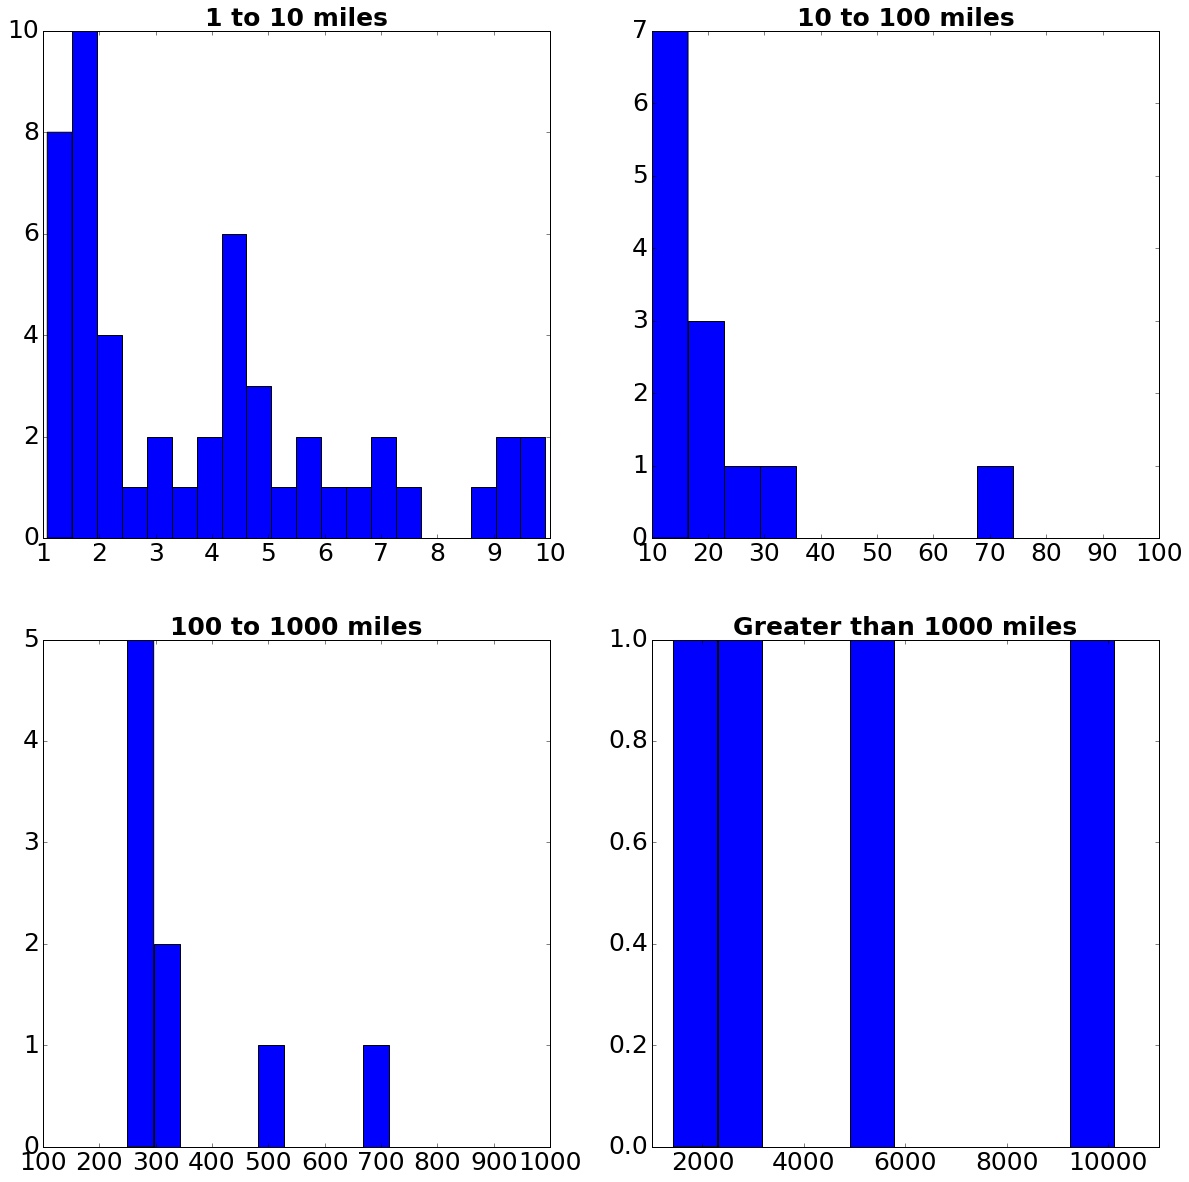

In [137]:
# Histogram of distance between points:
plt.figure(figsize=(20,20))
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

plt.subplot(221)
plt.hist(distance_btw_points_10, bins=20)
plt.xlim([1,10])
plt.title("1 to 10 miles", fontsize=25, fontweight='bold')


plt.subplot(222)
plt.hist(distance_btw_points_100)
plt.xlim([10,100])
plt.title("10 to 100 miles", fontsize=25, fontweight='bold')

plt.subplot(223)
plt.hist(distance_btw_points_1000)
plt.xlim([100,1000])
plt.title("100 to 1000 miles", fontsize=25, fontweight='bold')

plt.subplot(224)
plt.hist(distance_btw_points_big)
plt.xlim([1000,11000])
plt.title("Greater than 1000 miles", fontsize=25, fontweight='bold')

plt.show()

In [57]:
tweets_by_lang = tweets_full_dataframe['tweet_lang'].value_counts()
print(type(tweets_by_lang))
tmpLanguages = tweets_by_lang[:20]
print(tmpLanguages)
names = tmpLanguages.keys()
print(names)


<class 'pandas.core.series.Series'>
en    46381
es    12535
pt    10978
in     1128
fr      776
it      457
ht      287
de      191
lv      165
eu      161
ja      158
lt      157
cs      136
ro       87
tl       76
ar       65
ru       62
tr       62
nl       49
sl       46
Name: tweet_lang, dtype: int64
Index(['en', 'es', 'pt', 'in', 'fr', 'it', 'ht', 'de', 'lv', 'eu', 'ja', 'lt',
       'cs', 'ro', 'tl', 'ar', 'ru', 'tr', 'nl', 'sl'],
      dtype='object')


In [29]:
# List of language codes:
# https://en.wikipedia.org/wiki/List_of_ISO_639-2_codes

In [52]:
ind = list(range(1,21))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


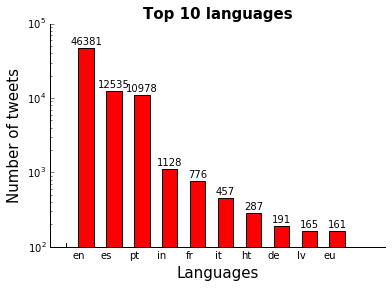

In [64]:
# Plotting languages
numLang = 10
tweets_by_lang = tweets_full_dataframe['tweet_lang'].value_counts()
tmpLanguages = tweets_by_lang[:numLang]
width = [0.55]
ind = list(range(1,numLang+1))
names = tmpLanguages.keys()

fig, ax = plt.subplots()
rects1 = ax.bar(ind, tmpLanguages, width, color='red')
plt.yscale('log')

ax.set_title('Top 10 languages', fontsize=15, fontweight='bold')
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_xlabel('Languages', fontsize=15)

# Hide the right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks(ind + width)
ax.set_xticklabels(names)


def autolabel(rects):
    # attach some text labels
    for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
plt.show()

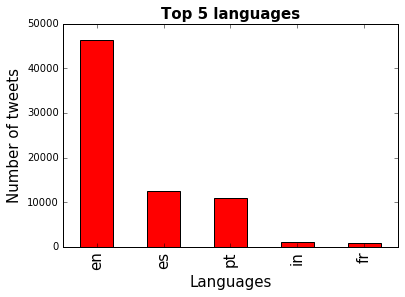

In [17]:
# Plotting the top 5 languages

tweets_by_lang = tweets_full_dataframe['tweet_lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')


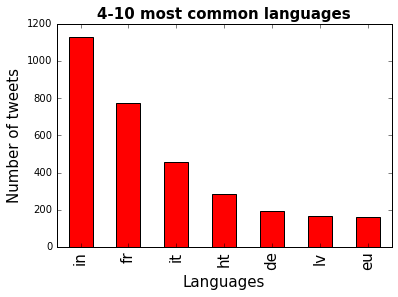

In [18]:
# Plotting the languages most common, after the 3 top

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('4-10 most common languages', fontsize=15, fontweight='bold')
tweets_by_lang[3:10].plot(ax=ax, kind='bar', color='red')


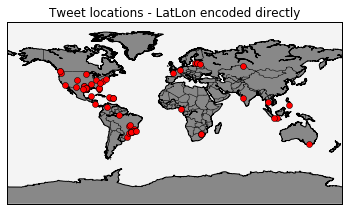

In [19]:
# Map out the tweet location by direct Lat Lon

# Use the Gall–Peters projection
map = Basemap(projection='gall', 
              resolution = 'l', 
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define longitude and latitude points
x,y = map(tweets_full_dataframe['geo_lons'].values, tweets_full_dataframe['geo_lats'].values)

# Plot using round, red markers, size 6
map.plot(x, y, 'ro', markersize=6)

plt.title('Tweet locations - LatLon encoded directly')

# Show the map
plt.show()

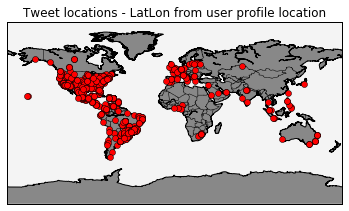

In [20]:
# Map out the tweet location by direct Lat Lon

# Use the Gall–Peters projection
map = Basemap(projection='gall', 
              resolution = 'l', 
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define longitude and latitude points
x,y = map(tweets_full_dataframe['user_lons'].values, tweets_full_dataframe['user_lats'].values)

# Plot using round, red markers, size 6
map.plot(x, y, 'ro', markersize=6)

plt.title('Tweet locations - LatLon from user profile location')

# Show the map
plt.show()